# MARLDynamics

> Modeling multi-agent reinforcement learning as dynamical systems

## Install
* clone this repository onto your disk
```sh
git clone https://github.com/wbarfuss/MARLDynamics.git
```

* enter the repositories folder
```sh
cd MARLDynamics
```

* install locally
```sh
pip install .
```

## How to use

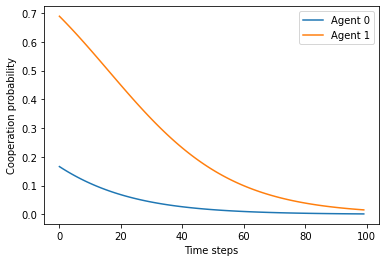

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from MARLDynamics.Agents.StrategyActorCritic import stratAC
from MARLDynamics.Environments.ExampleEnvironments import PrisonersDilemma

# Init enviornment and MultiAgentEnvironment-interface
env = PrisonersDilemma(R=1.0, T=1.5, S=-0.5, P=0.0)
MAEi = stratAC(env=env, learning_rates=0.1, discount_factors=0.9)

# Compute learning trajectory 
x = MAEi.random_softmax_policy()  # from a random inital policy
xtraj, fixedpointreached = MAEi.trajectory(x)

# Both agents learn to defect
plt.plot(xtraj[:, 0, 0, 0], label="Agent 0")
plt.plot(xtraj[:, 1, 0, 0], label="Agent 1")
plt.xlabel('Time steps')
plt.ylabel('Cooperation probability')
plt.legend();